In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sail.models.keras import KerasSequentialClassifier
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sail.transformers.river.preprocessing import StandardScaler

#### Load Data


In [2]:
X = pd.read_csv(
    "../../datasets/diabetes.csv",
)

y = X["Outcome"]
X.drop("Outcome", axis=1, inplace=True)

#### Model Definition


In [3]:
model = KerasSequentialClassifier(
    num_hidden_nodes=[16],
    hidden_layer_activation=["sigmoid"],
    num_output_nodes=1,
    outer_layer_activation="sigmoid",
    # optimizer=keras.optimizers.SGD(learning_rate=0.5, momentum=0.9, nesterov=True),
    random_state=43,
)

#### Start Training


In [4]:
y_preds = []
y_true = []
batch_size = 1

for start in range(0, X.shape[0], batch_size):
    end = start + batch_size

    X_train = X.iloc[start:end, :]
    y_train = y.iloc[start:end]

    if start != 0:
        preds = model.predict(X_train)
        if preds is not None:
            y_preds.extend(list(preds))
            y_true.extend(list(y_train))
    else:
        model.partial_fit(X_train, y_train, classes=[0, 1])

2023-12-15 17:15:36.068952: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


#### Save model


In [5]:
model.save_model("./model")

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets
[2023-12-15 17:16:04:740] - INFO - SAIL (TF_Keras) - Model saved successfully.


#### Classification Report


In [6]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_true, y_preds))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       500
           1       0.00      0.00      0.00       267

    accuracy                           0.65       767
   macro avg       0.33      0.50      0.39       767
weighted avg       0.42      0.65      0.51       767



#### Plot confusion matrix


<Axes: >

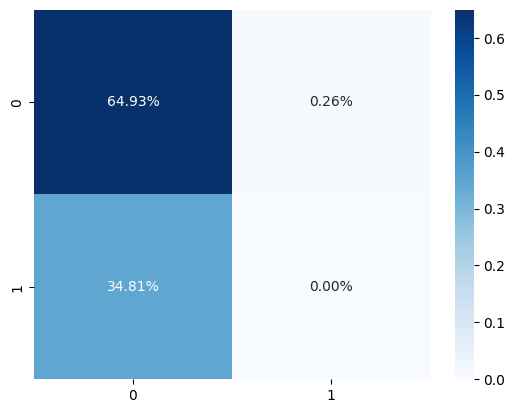

In [7]:
import seaborn as sns

cf_matrix = confusion_matrix(y_true, y_preds)
sns.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt=".2%", cmap="Blues")